In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [30]:
# Function for simple linear regression
def simple_linear_regression_fires(dataset):
    # Selecting a single environmental factor (e.g., temperature)
    X = dataset[['temp']]
    y = dataset['area']

    # Creating and fitting the linear regression model
    model = LinearRegression()
    model.fit(X, y)



    # Visualizing the regression line and scatter plot
    plt.scatter(X, y, color='green')
    plt.plot(X, model.predict(X), color='red')
    plt.xlabel('Temperature')
    plt.ylabel('Burned Area')
    plt.title('Linear Regression: Temperature vs Burned Area')
    plt.show()

    # Printing the regression coefficients
    print("Intercept:", model.intercept_)
    print("Coefficient:", model.coef_[0])

    # Interpretation of the regression coefficients and scatter plot
    # The intercept represents the predicted burned area when the temperature is 0.
    # The coefficient represents the change in the predicted burned area for a unit change in temperature.
    # The scatter plot shows the relationship between temperature and burned area, with the regression line representing the linear relationship between the two variables.


In [34]:
# Function for multiple linear regression
def multiple_linear_regression_fires(dataset):
    # Selecting multiple environmental factors (e.g., temperature, humidity, and wind speed)
    X = dataset[['temp', 'RH', 'wind']]
    y = dataset['area']

    # Creating and fitting the linear regression model
    model = LinearRegression()
    model.fit(X, y)



    # Visualizing the scatter plot and regression line
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X['temp'], X['RH'], y, color='maroon', label='Actual')

    # Create meshgrid for surface plot
    temp_mesh, RH_mesh = np.meshgrid(np.linspace(X['temp'].min(), X['temp'].max(), 10),
                                     np.linspace(X['RH'].min(), X['RH'].max(), 10))
    wind_mesh = np.full(temp_mesh.shape, X['wind'].mean())

    # Predict the burned area for the meshgrid
    area_pred = model.predict(pd.DataFrame({'temp': temp_mesh.ravel(),
                                            'RH': RH_mesh.ravel(),
                                            'wind': wind_mesh.ravel()}))
    area_mesh = area_pred.reshape(temp_mesh.shape)

    # Plot the regression surface
    ax.plot_surface(temp_mesh, RH_mesh, area_mesh, color='green', alpha=0.5)

    ax.set_xlabel('Temperature')
    ax.set_ylabel('RH')
    ax.set_zlabel('Burned Area')
    ax.set_title('Multiple Linear Regression')



    plt.show()


     # Printing the regression coefficients
    coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
    print(coefficients)

    # Evaluating the model's performance using Mean Squared Error (MSE)
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    print("Mean Squared Error:", mse)


    # Interpretation of the regression coefficients and performance metrics
    # The coefficients represent the change in the predicted burned area for a unit change in each environmental factor, while holding other factors constant.
    # The Mean Squared Error (MSE) measures the average squared difference between the predicted and actual burned areas. A lower MSE indicates better model performance.


In [32]:
# Load the Forest Fires dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv'
dataset = pd.read_csv(url)

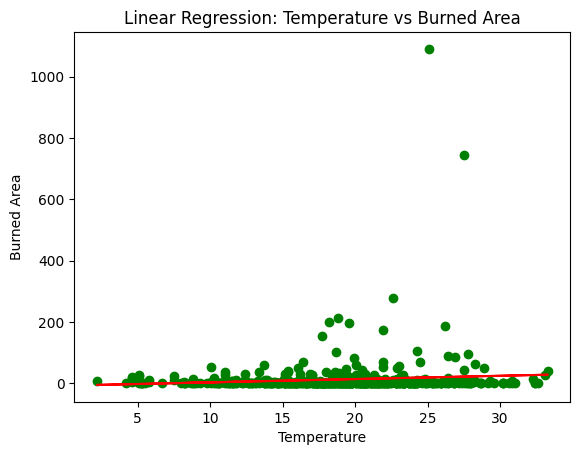

Intercept: -7.413751564770022
Coefficient: 1.072627621060047


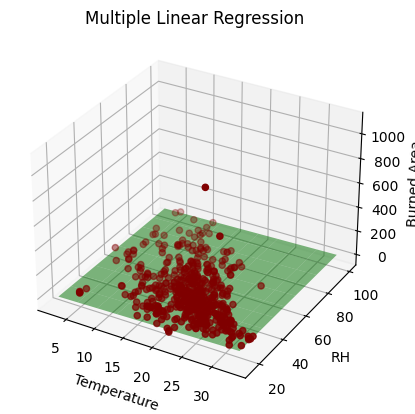

  Feature  Coefficient
0    temp     0.981720
1      RH    -0.119781
2    wind     1.235954
Mean Squared Error: 3997.6792313800415


In [35]:
# Call the functions
simple_linear_regression_fires(dataset)
multiple_linear_regression_fires(dataset)